# Scraping/Data Intake:

In [ ]:
import tweepy

In [ ]:
#authentication stuff/api initalization here, I can't really show you due to secret keys and all that.

In [ ]:
#class override- apparently this is SOP for tweepy
#but anyways- this allows for EXTREMELY fast data intake with a bit of preliminary data cleaning
class Listener(tweepy.StreamListener):
    
    def on_status(self,status):
        is_retweet = False
        #rt flag, start with false as default
        retweet_text= ""
        if hasattr(status, "retweeted_status"):
            is_retweet=True
            try:
                retweet_text = status.retweeted_status.extended_tweet["full_text"]
            except:
                retweet_text = status.retweeted_status.text
        
        #handles 140+ character tweets
        if hasattr(status, "extended_tweet"):
            text = status.extended_tweet["full_text"]
        else:
            text = status.text
        
        
        quoted_text =""
        if hasattr(status, "quoted_status"):
            #check if the QT was 140+ char
            if hasattr(status.quoted_status,"extended_tweet"):
                quoted_text = status.quoted_status.extended_tweet['full_text']
            else:
                quoted_text = status.quoted_status.text
                
        
        remove = [',','\n']
        for i in remove:
            text = text.replace(i," ")
            quoted_text = quoted_text.replace(i," ")
            retweet_text = retweet_text.replace(i," ")
            
        with open("data.csv","a",encoding='utf-8') as f:
            f.write("%s,%s,%s,%s,%s,%s\n"%(status.user.screen_name,is_retweet,status.created_at,text,quoted_text,retweet_text))
        #would do the insert here, i assume
    
    def on_error(self,status_code):
        print("Encountered streaming error (", status_code, ")")
        sys.exit()

# End-Product (at a high-level)

Anyways, the goal from here on out is to work on a keyword extractor search/function via streamlit;

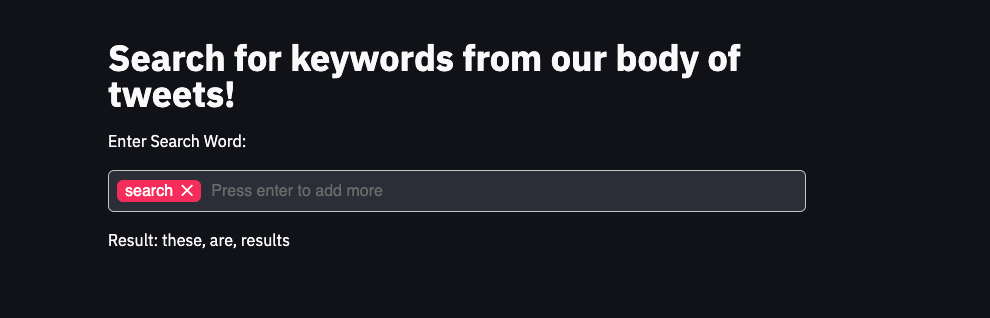

Searching will be done via my own implementation of a RAKE algorithm. Hoping to also be able to make the look-up window something the user can pass, and thus recalculating the co-occurring words on the fly (if run-time permits)